[View in Colaboratory](https://colab.research.google.com/github/alexamies/chinesenotes.com/blob/master/colab/explore_corpus.ipynb)

<h1>Exporing the Chinese Notes Corpus</h1>
This notebook explores the Chinese Notes corpus of historic and literary Chinese texts.

In [0]:
import pandas as pd
import numpy as np

<h2>The Collection of Documents</h2>
A collection is a list of text documents.

In [3]:
# Load list of collections of documents
colnames = ["Collection File", "HTML File", "Title", "Description", 
            "Introduction File", "Corpus", "Language", "Format", 
            "Period", "Genre"]
types = {"Collection File": np.object, "HTML File": np.object,
         "Corpus": np.object, "Description": np.object,
         "Introduction File": np.object, "Corpus": np.object,
         "Language": np.object, "Format": np.object,
         "Period": np.object, "Genre": np.object}
collections_url = "https://github.com/alexamies/chinesenotes.com/raw/master/data/corpus/collections.csv"
cols_df = pd.read_table(collections_url, names=colnames, dtype=types, comment='#')
num_col = len(cols_df.index)
print("Number of collections: ", num_col)

Number of collections:  67


Iterate through the collection metadata to find the number of documents in each collection

In [4]:
col_files = cols_df["Collection File"]
dcolnames = ["Source file", "output file", ""]
dtypes = {"Source file": np.object, "output file": np.object, "Title": np.object}
col_sizes = []
num_docs = 0
for f in col_files:
  f_url = "https://github.com/alexamies/chinesenotes.com/raw/master/data/corpus/" + f
  col_df = pd.read_table(f_url, names=dcolnames, dtype=dtypes, comment='#')
  num_doc = len(col_df.index)
  col_sizes.append(num_doc)
  num_docs += num_doc
print("Number of documents: ", num_docs)

Number of documents:  5246


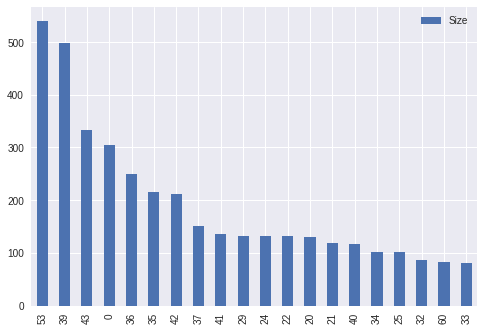

In [5]:
col_sizes_df = pd.DataFrame({
    "Title": cols_df["Title"],
    "Size": pd.Series(col_sizes)})
col_sizes_df.head()
col_sizes_df = col_sizes_df.sort_values(by=["Size"], ascending=False)
col_sizes_df[:20].plot(kind='bar');

The collections with the largest number of documents are

In [6]:
col_sizes_df.head()

,Size,Title
53,540,Shuo Wen Jie Zi 《說文解字》
39,498,History of Song 《宋史》
43,333,History of Ming 《明史》
0,305,The Book of Songs 《詩經》
36,249,New Book of Tang 《新唐書》


<h2> Word Frequencies</h2>
Information about the word frequencies files is given in 
<a href="https://github.com/alexamies/chinesenotes.com/blob/master/index/index-README.md">index-README.md</a>.

In [10]:
# Load list of words and their frequencies
fcolnames = ["Word", "Frequency", "Rate"]
ftypes = {"Word": np.object, "Frequency": np.uint64, "Rate": np.float64}
wf_url = "https://github.com/alexamies/chinesenotes.com/raw/master/index/word_frequencies.txt"
wf_df = pd.read_table(wf_url, names=fcolnames, dtype=ftypes, comment='#')
wf_df.head()

,Word,Frequency,Rate
0,之,543195,229.824448
1,以,278785,117.953237
2,為,233877,98.952774
3,曰,210243,88.953288
4,其,193073,81.688704


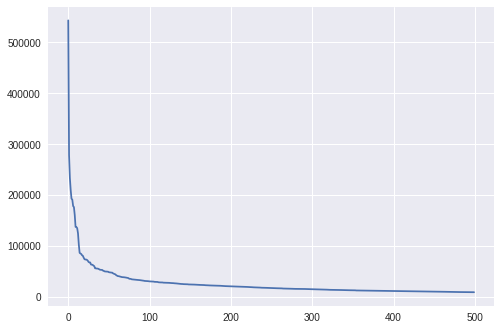

In [16]:
wf_df["Frequency"][:500].plot(kind='line');

<h2>Bigrams</h2>
Bigrams are a source of new words that have not yet been added to the dictionary and also collocations.

In [18]:
# Load list of bigrams and their frequencies
bfcolnames = ["Bigram", "Frequency", "Rate"]
bftypes = {"Bigram": np.object, "Frequency": np.uint64, "Rate": np.float64}
bf_url = "https://github.com/alexamies/chinesenotes.com/raw/master/index/ngram_frequencies.txt"
bf_df = pd.read_table(bf_url, names=bfcolnames, dtype=bftypes, comment='#')
bf_df.head()

,Bigram,Frequency,Rate
0,二年,18044,7.634371
1,三年,17147,7.254853
2,四年,11469,4.852505
3,州刺史,10924,4.621917
4,中書,10745,4.546183


<h2>Vector Space Model</h2>
The indexing process computes the word frequencies for each document in the corpus and generates
word_freq_doc.txt but the file is too big to check into GitHub. The file
<a href="https://github.com/alexamies/chinesenotes.com/blob/master/index/word_freq_shijing.txt">word_freq_shijing.txt</a>
is provided for prototyping with the word frequencies for each document in the <i>Book of Songs</i>
詩經 (shijing).

In [19]:
# Load word frequencies for shijing
wfdcolnames = ["Word", "Frequency", "Rate", "File"]
wfdtypes = {"Word": np.object, "Frequency": np.uint64, "Rate": np.float64,
           "File": np.object}
wfd_url = "https://github.com/alexamies/chinesenotes.com/raw/master/index/word_freq_shijing.txt"
wfd_df = pd.read_table(wfd_url, names=wfdcolnames, dtype=wfdtypes)
wfd_df.head()

,Word,Frequency,Rate,File
0,之,54,1060.903733,shijing/shijing001.txt
1,風,18,353.634578,shijing/shijing001.txt
2,也,17,333.988212,shijing/shijing001.txt
3,曰,13,255.402750,shijing/shijing001.txt
4,以,12,235.756385,shijing/shijing001.txt


One of the simplest measures for document similarity is a dot product of word frequencies in a vector
space (Zhai and Massung 2016, p. 93). An alternative the using the word frequencies is to use 1 if the word is present in the document. In addition to the similarity of two documents, one 'document' can be a search query. Then the formula is

Sim(q, d) = **q**∙**d**

For example, the query "后妃之德" 'the virtue of the imperial consort' can be decomposed into the words ("后妃", "之", "德") and compared to the occurences in [Chapter 2](http://chinesenotes.com/shijing/shijing002.html) in the <i>Book of Songs</i> with frequencies (1, 1, 1) as

In [2]:
similarity_q_ch2 = 1*1 + 1*1 + 1*1
print("Similarity between query and Chapter 2: ", similarity_q_ch2)

Similarity between query and Chapter 2:  3


This can be compared to the occurrance  in [Chapter 3](http://chinesenotes.com/shijing/shijing003.html) (1, 1, 0)

In [3]:
similarity_q_ch3 = 1*1 + 1*1 + 1*0
print("Similarity between query and Chapter 3: ", similarity_q_ch3)

Similarity between query and Chapter 3:  2


The higher value for Chapter 2 shows that it is more similar to the query. Indeed this exact string in present
in Chapter 2.

<h2>References</h2>
<ol>
  <li>Zhai, Chengxiang and Sean Massung 2016, <i>Text Data Management and Analysis: A Practical Introduction to Information Retrieval and Text Mining</i>. Association for Computing Machinery; Morgan &amp; Claypool.
</li>
</ol>